In [21]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [9]:
# importing data from the california housing data set
data = "../Resources/California_Housing.csv"
ca_housing_df = pd.read_csv(data)
ca_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


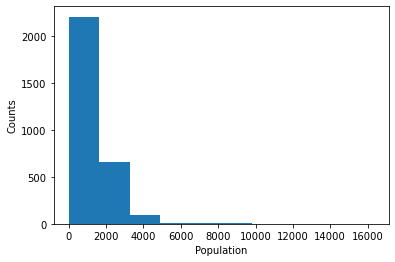

Mean: 1387.9633333333334
Median: 1152.5
Mode: 0    1128.0
dtype: float64


In [16]:
# determining the measure of central tendency
population = ca_housing_df["Population"]
plt.hist(population)
plt.xlabel("Population")
plt.ylabel("Counts")
plt.show()

print(f"Mean: {population.mean()}")
print(f"Median: {population.median()}")
print(f"Mode: {population.mode()}")

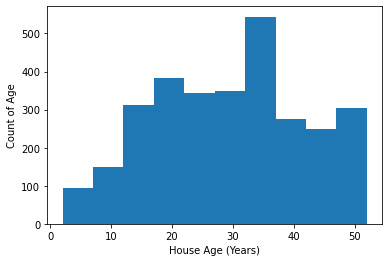

NormaltestResult(statistic=1.5058197237575135, pvalue=0.4709940292118051)


In [23]:
# checking if the age of the house is normally distributed
ca_age = ca_housing_df["HouseAge"]
plt.hist(ca_age)
plt.xlabel("House Age (Years)")
plt.ylabel("Count of Age")
plt.show()

print(sts.normaltest(ca_age.sample(100)))

In [36]:
# checking for potential outliers within the dataset
avg_occupancy = ca_housing_df["AveOccup"]
quartiles = avg_occupancy.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile is {lowerq}.")
print(f"The upper quartile is {upperq}.")
print(f"The interquartile range is {iqr}")
print(f"The median of the occupancy is {quartiles[.5]}")

lower_range = lowerq - (1.5*iqr)
upper_range = upperq + (1.5*iqr)

print(f"Values above the upper range, {upper_range} could be considered an outlier.")
print(f"Values below the lower range, {lower_range} could be considered an outlier.")

The lower quartile is 2.4250909806040477.
The upper quartile is 3.2974592743428355.
The interquartile range is 0.8723682937387878
The median of the occupancy is 2.81970199317512
Values above the upper range, 4.606011714951017 could be considered an outlier.
Values below the lower range, 1.116538539995866 could be considered an outlier.


In [37]:
#outliers are defined being outside the upper and lower ranges
outliers = ca_housing_df.loc[(ca_housing_df["AveOccup"]>upper_range) | (ca_housing_df["AveOccup"]<lower_range)]
outliers

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14
...,...,...,...,...,...,...,...,...
2793,2.5556,11.0,5.825112,1.255605,1158.0,5.192825,34.96,-120.45
2849,9.8892,40.0,8.244019,0.995215,976.0,4.669856,37.46,-122.20
2907,4.8750,5.0,7.101721,1.176056,7694.0,6.020344,34.69,-118.20
2919,1.6150,42.0,4.824000,1.216000,1167.0,4.668000,33.96,-118.28


In [38]:
# checking the highest and lowest incomes within the outliers
highest_inc = outliers["MedInc"].max()
lowest_inc = outliers["MedInc"].min()

print(f"The highest median income among the outliers is {highest_inc}")
print(f"The lowest median income among the outliers is {lowest_inc}")

The highest median income among the outliers is 15.0001
The lowest median income among the outliers is 0.716


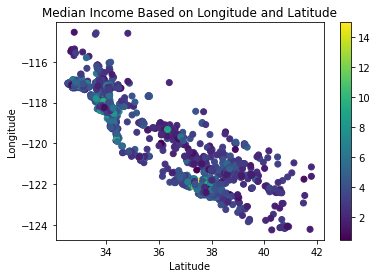

In [44]:
#plotting latitude and longitude with colors based on the medium income
plt.scatter(ca_housing_df["Latitude"], ca_housing_df["Longitude"], c=ca_housing_df["MedInc"])
plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Median Income Based on Longitude and Latitude")
plt.show()